# Time Series Forecasting with Tensorflow / Predicting the price of Bitcoin 🪙

## Get the data

In [156]:
# Download Bitcoin data for the past year https://www.marketwatch.com/investing/cryptocurrency/btcusd/download-data?startDate=01/26/2021&endDate=01/26/2024
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## importing time series with pandas

In [157]:
# Import pandas
import pandas as pd
# Lets read in our bitcoin data and parse the dates
df = pd.read_csv("/content/drive/MyDrive/Download Data - CRYPTOCURRENCY_US_COINDESK_BTCUSD.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # parse the date colum and tell pandas its a date dolumn

In [158]:
df.head()

,Open,High,Low,Close
Date,,,,
2024-01-26,"39,935","42,229","39,853","42,013"
2024-01-25,"39,800","40,324","39,535","39,936"
2024-01-24,"39,248","40,573","39,210","39,782"
2024-01-23,"39,867","40,153","38,551","39,245"
2024-01-22,"41,805","41,809","39,488","39,852"


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2024-01-26 to 2023-01-26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Open    366 non-null    object
 1   High    366 non-null    object
 2   Low     366 non-null    object
 3   Close   366 non-null    object
dtypes: object(4)
memory usage: 14.3+ KB


In [160]:
len(df)

366

In [161]:
# only wantt close price for each day
bitcoin_prices = pd.DataFrame(df["Close"]).rename(columns={"Close": "Price"})
bitcoin_prices.head()

,Price
Date,
2024-01-26,"42,013"
2024-01-25,"39,936"
2024-01-24,"39,782"
2024-01-23,"39,245"
2024-01-22,"39,852"


In [162]:
bitcoin_prices["Price"] = bitcoin_prices["Price"].str.replace(',', '')

In [163]:
bitcoin_prices["Price"] = bitcoin_prices["Price"].astype('float32')

In [164]:
bitcoin_prices.to_csv("output_file", index=False)

## Visualizing our bitcoin data


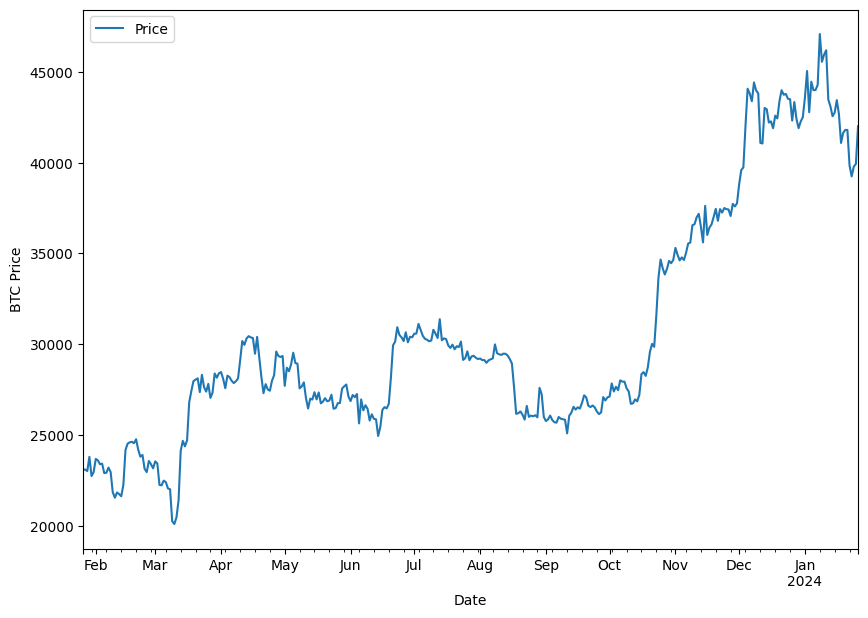

In [165]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.xlabel("Date", fontsize=10)
plt.legend()

## Importing time series data with Python's CSV Module

In [166]:
# Importing and formating Bitcoin data with Python
import csv
from datetime import datetime
timesteps = []
btc_price = []
with open("/content/drive/MyDrive/Download Data - CRYPTOCURRENCY_US_COINDESK_BTCUSD.csv", "r") as f:

  csv_reader = csv.DictReader(f)
  next(csv_reader) # skip the first line
  for line in csv_reader:
    timesteps.append(datetime.strptime(line["Date"], "%m/%d/%Y"))
    btc_price.append(float(line["Close"].replace(',', '')))

timesteps[:10], btc_price[:10]

([datetime.datetime(2024, 1, 25, 0, 0),
  datetime.datetime(2024, 1, 24, 0, 0),
  datetime.datetime(2024, 1, 23, 0, 0),
  datetime.datetime(2024, 1, 22, 0, 0),
  datetime.datetime(2024, 1, 21, 0, 0),
  datetime.datetime(2024, 1, 20, 0, 0),
  datetime.datetime(2024, 1, 19, 0, 0),
  datetime.datetime(2024, 1, 18, 0, 0),
  datetime.datetime(2024, 1, 17, 0, 0),
  datetime.datetime(2024, 1, 16, 0, 0)],
 [39936.0,
  39782.0,
  39245.0,
  39852.0,
  41805.0,
  41805.0,
  41643.0,
  41089.0,
  42683.0,
  43447.0])

Text(0.5, 0, 'Date')

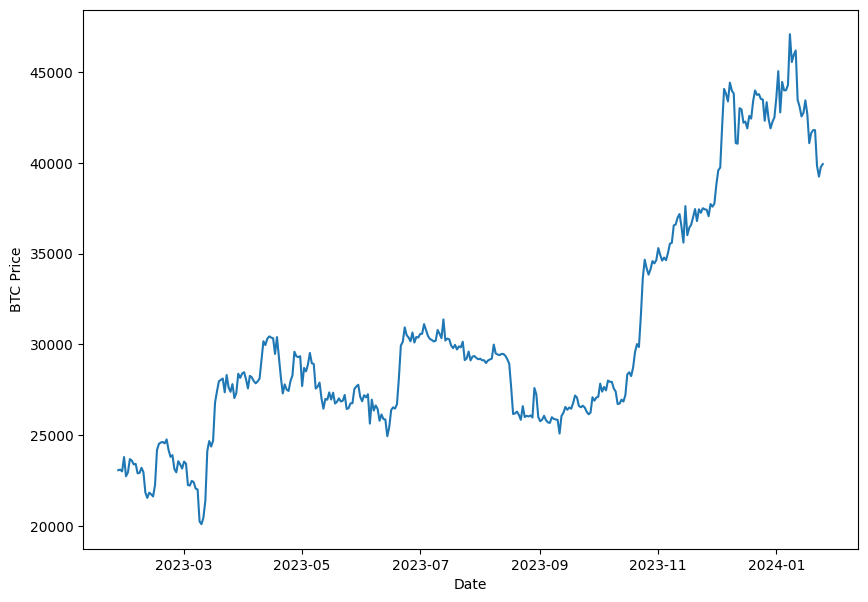

In [167]:
# Plot from csv
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.xlabel("Date", fontsize=10)

## Format data part 1: Create train and test sets of our time series data

### Creating train and test sets (the wrong way)

In [277]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()
prices = prices[::-1]
timesteps = timesteps[::-1]
timesteps[:10], prices[:10]

(array(['2024-01-26T00:00:00.000000000', '2024-01-25T00:00:00.000000000',
        '2024-01-24T00:00:00.000000000', '2024-01-23T00:00:00.000000000',
        '2024-01-22T00:00:00.000000000', '2024-01-21T00:00:00.000000000',
        '2024-01-20T00:00:00.000000000', '2024-01-19T00:00:00.000000000',
        '2024-01-18T00:00:00.000000000', '2024-01-17T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([42013., 39936., 39782., 39245., 39852., 41805., 41805., 41643.,
        41089., 42683.], dtype=float32))

In [169]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps,
                                                    prices,
                                                    test_size = 0.2,
                                                    random_state = 42
                                                    )

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((292,), (74,), (292,), (74,))

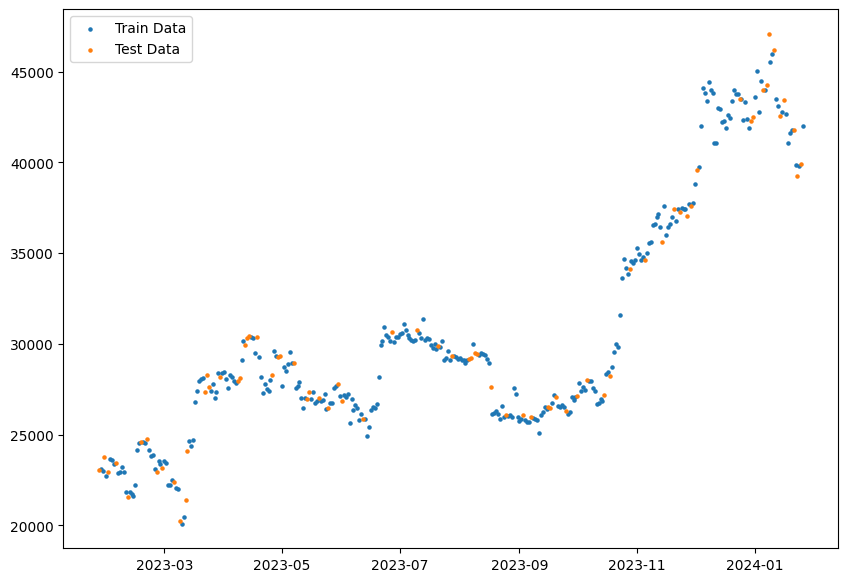

In [170]:
# Lets plot the train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train Data")
plt.scatter(X_test, y_test, s=5, label="Test Data")
plt.legend()

### Create Train and Test sets for time series (The right way)

In [171]:
# Create train and test splits the right way
split_size = int(0.8 * len(prices)) # 80% train, 20% test - you can change these values as needed

# Create train datasplits (everything before splits)
X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(292, 74, 292, 74)

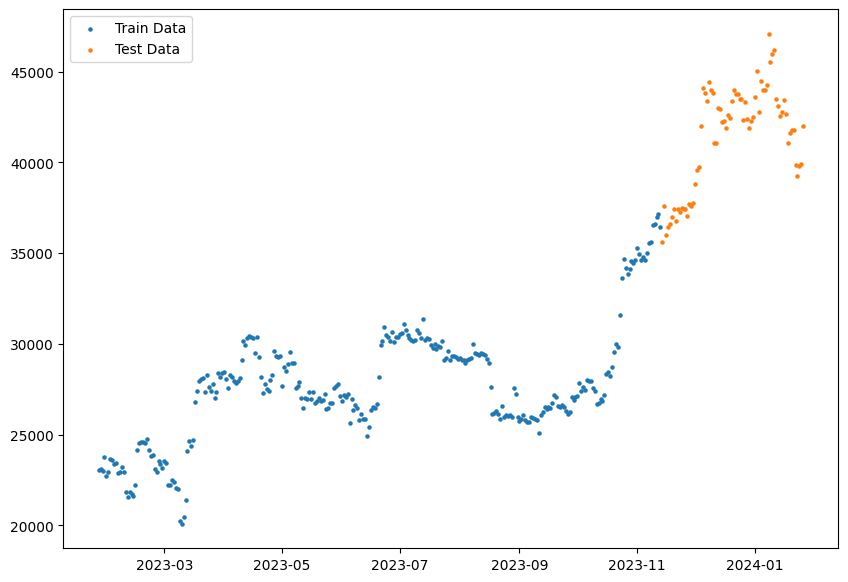

In [172]:
# Lets plot the train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train Data")
plt.scatter(X_test, y_test, s=5, label="Test Data")
plt.legend()

## Create a plotting function

In [173]:
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

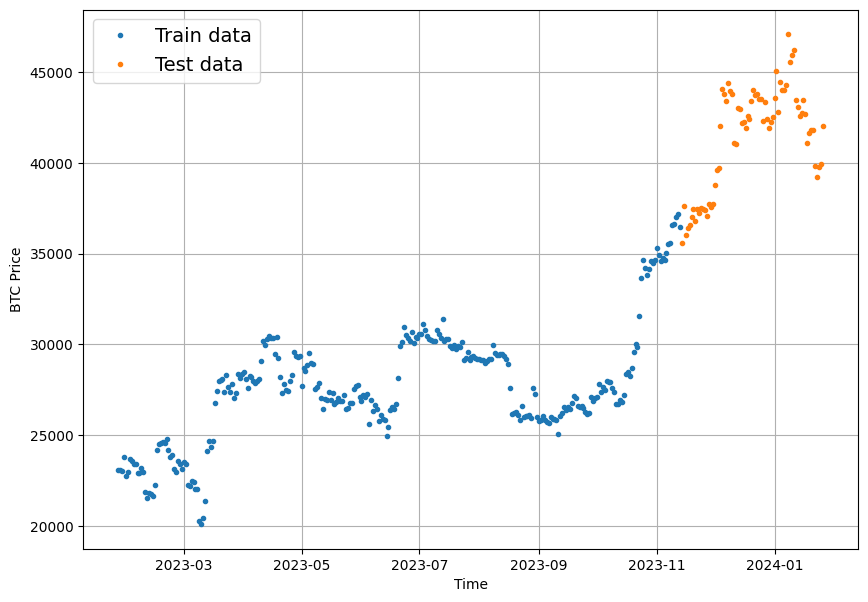

In [174]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

## Modelling experiments


## Model 1: Naive forecast (baseline)

Formula:

$$\hat{y}_{t} = y_{t-1}$$

> The prediciton at timestep (t) `y-hat` is equal to the value at timestep (t-1)

In [175]:
# Create naive forecast

naive_forecast = y_test[:-1]

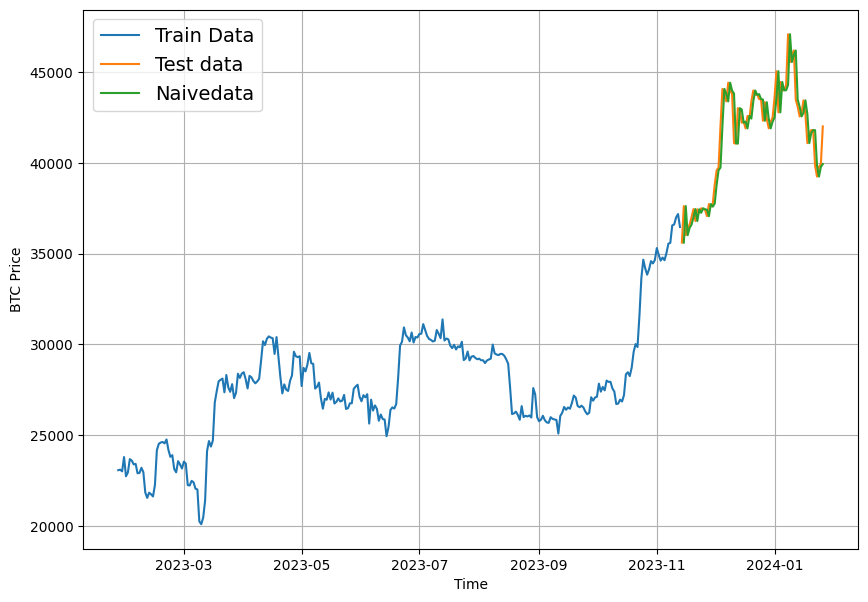

In [176]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train,format="-", label="Train Data")
plot_time_series(timesteps=X_test, values=y_test, format="-", label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naivedata")

### Evaluating a time series model

We are predicting a number, some form of a regression problem

A few common regression metrics:
1. MAE
2. MSE
3. RMSE
4. MAPE/sMAPE
5. MASE

In [177]:
import tensorflow as tf

In [178]:
def mean_absolute_scaled_error(y_true, y_pred):
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
  return mae/mae_naive_no_season

In [179]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

1.0236057

In [180]:
# Create a function to take in model predicitons and truth values and reutrn evalutation
def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [181]:
naive_results = evaluate_preds(y_true=y_test[1:],
               y_pred=naive_forecast)
naive_results

{'mae': 756.274,
 'mse': 1118652.5,
 'rmse': 1057.6637,
 'mape': 1.806729,
 'mase': 1.0236057}

## Format Data: Windowing our dataset

In [182]:
# Lets set up global variables for window and horizon size

HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use past week of data to make prediction


In [183]:
# create a function
def get_labelled_window(x, horizon=HORIZON):
  return x[:, :-horizon], x[:, -horizon:]

In [184]:
import numpy as np
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):

  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T
  windowed_array = x[window_indexes]
  windows, labels = get_labelled_window(windowed_array, horizon=horizon)
  return windows, labels

In [185]:
full_windows, full_labels = make_windows(prices)
for i in range(3):
  print(f"Window = {full_windows[i]} -> Label {full_labels[i]}")

Window = [23068. 23097. 23005. 23792. 22732. 22950. 23678.] -> Label [23598.]
Window = [23097. 23005. 23792. 22732. 22950. 23678. 23598.] -> Label [23387.]
Window = [23005. 23792. 22732. 22950. 23678. 23598. 23387.] -> Label [23417.]


## Turning windows into training and test sets

In [186]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split = 0.2):
  split_size = int(len(windows) * (1-test_split))
  train_windows = windows[:split_size]
  train_labels = windows[:split_size]
  test_windows = windows[split_size:]
  test_labels = windows[split_size:]
  return train_windows, train_labels, test_windows, test_labels

In [187]:
# Create
train_windows, train_labels, test_windows, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows)

287

## Making a modeling checkpoint

In [188]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_expriments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0,
                                            monitor="val_loss",
                                            save_best_only=True)

## Model 2: Dense Model (window = 7, horizon = 1)


In [189]:
from tensorflow.keras import layers

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear"),
], name="Model_2_Dense")

model_2.compile(loss="mae",
                optimizer="adam",
                metrics=["mae"])
model_2.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])


Epoch 1/100
3/3 [==============================] - 2s 620ms/step - loss: 34950.8945 - mae: 34950.8945 - val_loss: 46588.6719 - val_mae: 46588.6719
Epoch 2/100
3/3 [==============================] - 0s 198ms/step - loss: 30063.7695 - mae: 30063.7695 - val_loss: 39377.6602 - val_mae: 39377.6602
Epoch 3/100
3/3 [==============================] - 0s 193ms/step - loss: 25253.9863 - mae: 25253.9863 - val_loss: 32239.1074 - val_mae: 32239.1074
Epoch 4/100
3/3 [==============================] - 0s 205ms/step - loss: 20503.7344 - mae: 20503.7344 - val_loss: 25179.3184 - val_mae: 25179.3184
Epoch 5/100
3/3 [==============================] - 0s 192ms/step - loss: 15774.5117 - mae: 15774.5117 - val_loss: 18062.1328 - val_mae: 18062.1328
Epoch 6/100
3/3 [==============================] - 0s 195ms/step - loss: 11000.0547 - mae: 11000.0547 - val_loss: 10895.9043 - val_mae: 10895.9043
Epoch 7/100
3/3 [==============================] - 0s 206ms/step - loss: 6219.6372 - mae: 6219.6372 - val_loss: 3687.6

In [190]:
model_2.evaluate(test_windows, test_labels)

3/3 [==============================] - 0s 7ms/step - loss: 761.2192 - mae: 761.2192


[761.21923828125, 761.21923828125]

In [191]:
model_2 = tf.keras.models.load_model("/content/model_expriments/Model_2_Dense")
model_2.evaluate(test_windows, test_labels)

3/3 [==============================] - 0s 7ms/step - loss: 760.5845 - mae: 760.5845


[760.5845336914062, 760.5845336914062]

## Making forecasts with a model (on the test dataset)


In [192]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [193]:
model_2_preds = make_preds(model_2, test_windows)
len(model_2_preds), model_2_preds.shape, test_labels.shape

3/3 [==============================] - 0s 4ms/step


(72, TensorShape([72]), (72, 7))

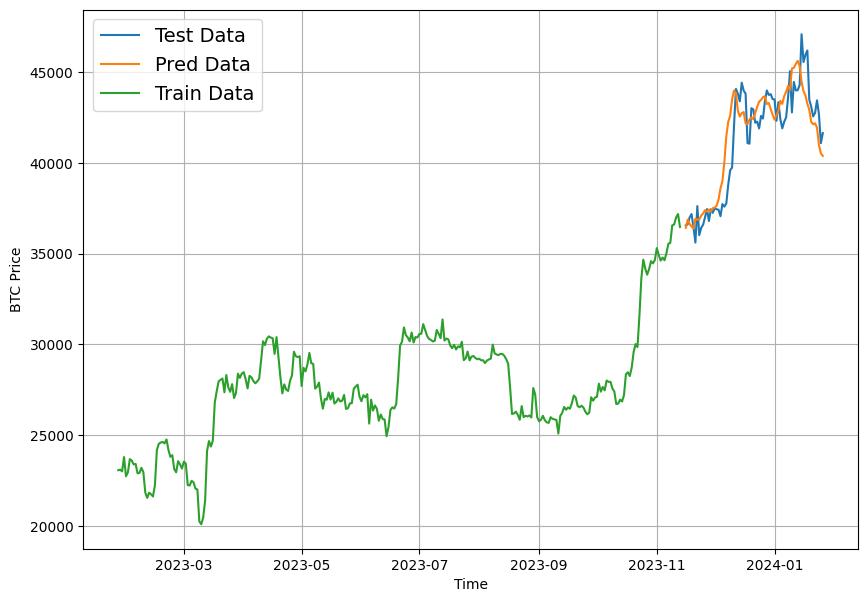

In [194]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], format="-", label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds,format="-",  label="Pred Data")
plot_time_series(timesteps=X_train, values=y_train,format="-", label="Train Data")

In [195]:
model_2_results = evaluate_preds(y_true=test_labels[:, 0],
               y_pred=model_2_preds)
model_2_results

{'mae': 1111.5935,
 'mse': 1964353.8,
 'rmse': 1401.5541,
 'mape': 2.6814172,
 'mase': 1.5201205}

<Axes: >

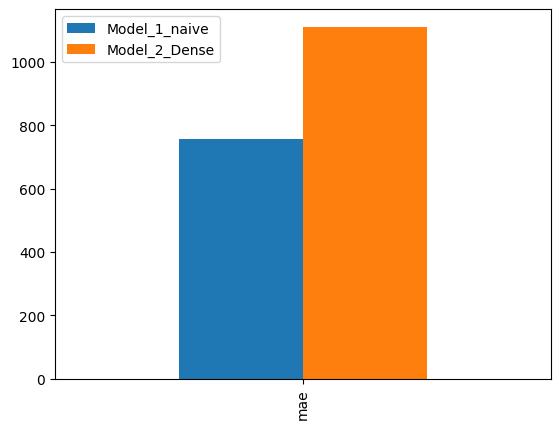

In [196]:
pd.DataFrame({"Model_1_naive": naive_results["mae"],
              "Model_2_Dense": model_2_results["mae"],
},index = ["mae"]).plot(kind="bar")

## Model 3: Conv1D

In [197]:
# Before we pass our data to a Conv1D model we need to reshape it
train_windows[0].shape

(7,)

In [198]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for our input layer

In [199]:
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=7, padding="causal", activation="relu"),
    layers.Dense(HORIZON),
    ], name="Model_3_Conv1D")
model_3.compile(loss="mae",
                optimizer="adam")
model_3.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])


In [200]:
model_3.summary()

Model: "Model_3_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_10 (Lambda)          (None, 1, 7)              0         
                                                                 
 conv1d_7 (Conv1D)           (None, 1, 128)            6400      
                                                                 
 dense_306 (Dense)           (None, 1, 1)              129       
                                                                 
Total params: 6529 (25.50 KB)
Trainable params: 6529 (25.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [201]:
model_3.evaluate(test_windows, test_labels)

3/3 [==============================] - 0s 5ms/step - loss: 746.5154


746.5154418945312

In [202]:
model_3 = tf.keras.models.load_model("/content/model_expriments/Model_3_Conv1D")
model_3.evaluate(test_windows, test_labels)

3/3 [==============================] - 0s 5ms/step - loss: 746.1874


746.1873779296875

In [203]:
model_3_preds = make_preds(model_3, test_windows)
len(model_3_preds), model_3_preds.shape, test_labels.shape

3/3 [==============================] - 0s 4ms/step


(72, TensorShape([72]), (72, 7))

In [204]:
model_3_results = evaluate_preds(y_true=test_labels[:, 0],
               y_pred=model_3_preds)
model_3_results

{'mae': 983.2179,
 'mse': 1584170.9,
 'rmse': 1258.6384,
 'mape': 2.374422,
 'mase': 1.3445649}

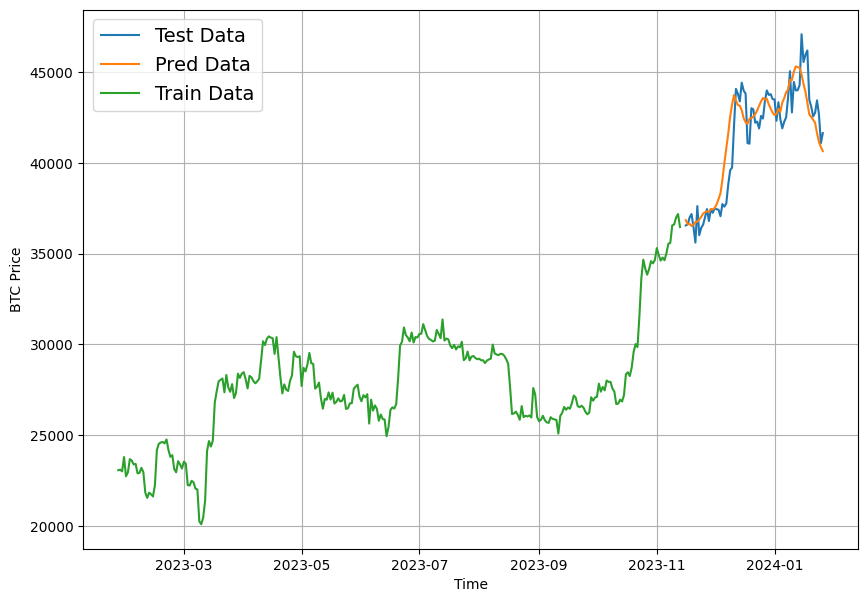

In [205]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], format="-", label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds,format="-",  label="Pred Data")
plot_time_series(timesteps=X_train, values=y_train,format="-", label="Train Data")

## Model 4: RNN (LSTM)

In [206]:
tf.random.set_seed(42)

# Create a RNN model with the functional api
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
#x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
#x = layers.Dense(32, activation="relu")(X)
output = layers.Dense(HORIZON)(x)
model_4 = tf.keras.Model(inputs=inputs, outputs=output, name="Model_4_LSTM")

model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_4.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

Epoch 1/100
3/3 [==============================] - 5s 1s/step - loss: 32010.0723 - val_loss: 46335.1445
Epoch 2/100
3/3 [==============================] - 2s 744ms/step - loss: 30699.6543 - val_loss: 44505.3281
Epoch 3/100
3/3 [==============================] - 2s 893ms/step - loss: 29501.0176 - val_loss: 42793.2383
Epoch 4/100
3/3 [==============================] - 2s 1s/step - loss: 28357.5000 - val_loss: 41086.4922
Epoch 5/100
3/3 [==============================] - 1s 725ms/step - loss: 27215.8281 - val_loss: 39388.7500
Epoch 6/100
3/3 [==============================] - 1s 718ms/step - loss: 26102.8711 - val_loss: 37921.1133
Epoch 7/100
3/3 [==============================] - 1s 713ms/step - loss: 25146.1094 - val_loss: 36537.6641
Epoch 8/100
3/3 [==============================] - 1s 703ms/step - loss: 24224.4141 - val_loss: 35147.2070
Epoch 9/100
3/3 [==============================] - 1s 710ms/step - loss: 23290.8301 - val_loss: 33721.4023
Epoch 10/100
3/3 [=========================

In [207]:
model_4.summary()

Model: "Model_4_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 7)]               0         
                                                                 
 lambda_11 (Lambda)          (None, 1, 7)              0         
                                                                 
 lstm_2 (LSTM)               (None, 128)               69632     
                                                                 
 dense_307 (Dense)           (None, 1)                 129       
                                                                 
Total params: 69761 (272.50 KB)
Trainable params: 69761 (272.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [208]:
model_4.evaluate(test_windows, test_labels)

3/3 [==============================] - 0s 5ms/step - loss: 742.4772


742.4772338867188

In [209]:
model_4 = tf.keras.models.load_model("/content/model_expriments/Model_4_LSTM")
model_4.evaluate(test_windows, test_labels)

3/3 [==============================] - 0s 8ms/step - loss: 741.9485


741.948486328125

In [210]:
model_4_preds = make_preds(model_4, test_windows)

3/3 [==============================] - 0s 6ms/step


In [211]:
model_4_results = evaluate_preds(y_true=test_labels[:, 0],
               y_pred=model_4_preds)
model_4_results

{'mae': 923.71844,
 'mse': 1385796.5,
 'rmse': 1177.1986,
 'mape': 2.2277527,
 'mase': 1.2631986}

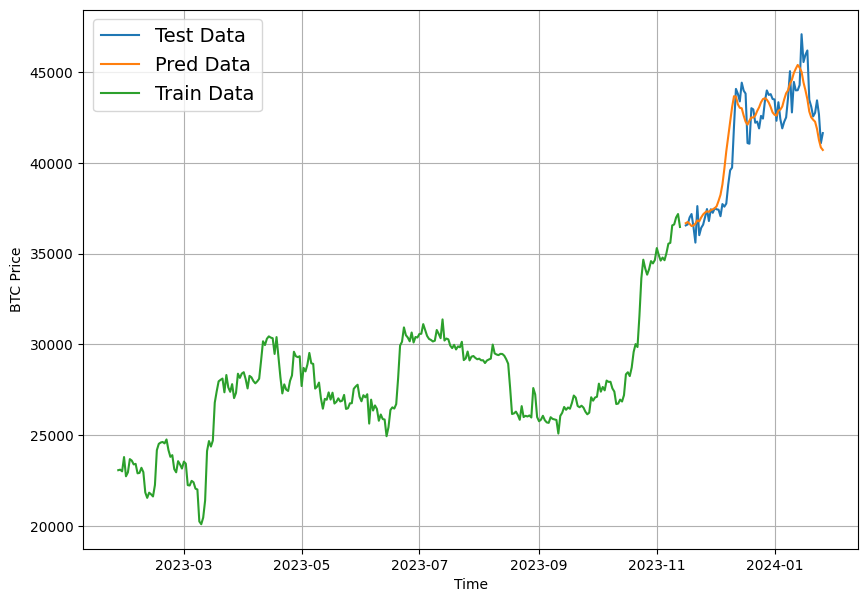

In [212]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], format="-", label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_4_preds,format="-",  label="Pred Data")
plot_time_series(timesteps=X_train, values=y_train,format="-", label="Train Data")

## Model 5:Make a multivariate time series dataset

In [213]:
# Let's make a multivariate time series
bitcoin_prices = bitcoin_prices[::-1]


In [214]:
bitcoin_prices

,Price
Date,
2023-01-26,23068.0
2023-01-27,23097.0
2023-01-28,23005.0
2023-01-29,23792.0
2023-01-30,22732.0
...,...
2024-01-22,39852.0
2024-01-23,39245.0
2024-01-24,39782.0


In [215]:
# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020
block_reward_5 = 3.125 # 20 FEB 2024

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")
block_reward_5_datetime = np.datetime64("2024-01-20")

In [278]:
# Get date indexes for when to add in different block dates
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_4_days = (block_reward_5_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(-2392, -990)

In [217]:
# Add block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.iloc[block_reward_3_days:block_reward_4_days, -1] = block_reward_5
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2023-01-26,23068.0,3.125
2023-01-27,23097.0,3.125
2023-01-28,23005.0,3.125
2023-01-29,23792.0,3.125
2023-01-30,22732.0,3.125


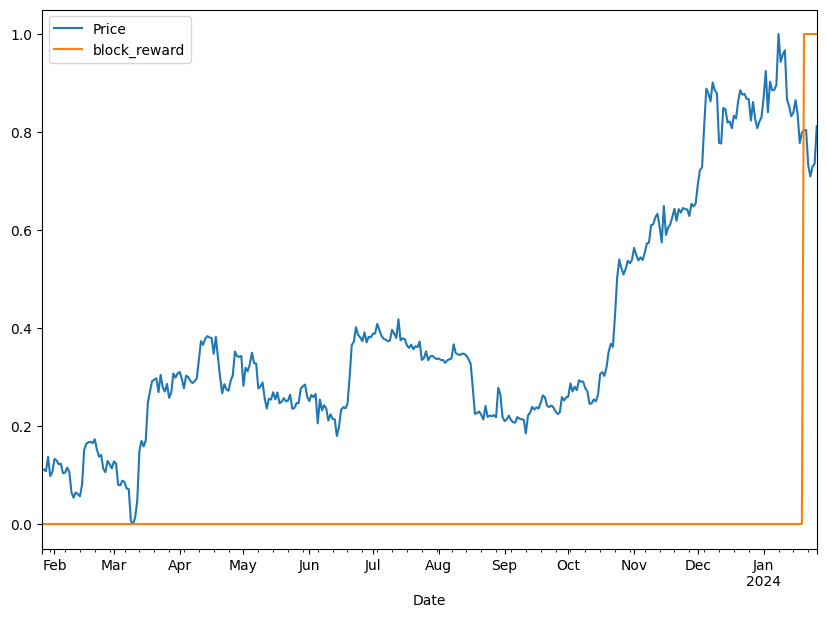

In [218]:
# Plot the block reward/price over time
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

In [219]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2023-01-26,23068.0,3.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-27,23097.0,3.125,23068.0,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-28,23005.0,3.125,23097.0,23068.0,NaN,NaN,NaN,NaN,NaN
2023-01-29,23792.0,3.125,23005.0,23097.0,23068.0,NaN,NaN,NaN,NaN
2023-01-30,22732.0,3.125,23792.0,23005.0,23097.0,23068.0,NaN,NaN,NaN
2023-01-31,22950.0,3.125,22732.0,23792.0,23005.0,23097.0,23068.0,NaN,NaN
2023-02-01,23678.0,3.125,22950.0,22732.0,23792.0,23005.0,23097.0,23068.0,NaN
2023-02-02,23598.0,3.125,23678.0,22950.0,22732.0,23792.0,23005.0,23097.0,23068.0
2023-02-03,23387.0,3.125,23598.0,23678.0,22950.0,22732.0,23792.0,23005.0,23097.0


In [220]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2023-02-02,3.125,23678.0,22950.0,22732.0,23792.0,23005.0,23097.0,23068.0
2023-02-03,3.125,23598.0,23678.0,22950.0,22732.0,23792.0,23005.0,23097.0
2023-02-04,3.125,23387.0,23598.0,23678.0,22950.0,22732.0,23792.0,23005.0
2023-02-05,3.125,23417.0,23387.0,23598.0,23678.0,22950.0,22732.0,23792.0
2023-02-06,3.125,22896.0,23417.0,23387.0,23598.0,23678.0,22950.0,22732.0


In [221]:
# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(287, 287, 72, 72)

In [222]:
tf.random.set_seed(42)

# Make multivariate time series model
model_5 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  layers.Dense(HORIZON)
], name="model_5_dense_multivariate")

# Compile
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_5.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, # only print 1 line per epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

In [223]:
model_5 = tf.keras.models.load_model("/content/model_expriments/model_5_dense_multivariate")
model_5.evaluate(X_test, y_test)


3/3 [==============================] - 0s 4ms/step - loss: 953.4078


953.4077758789062

In [224]:
model_5_preds = tf.squeeze(model_5.predict(X_test))

3/3 [==============================] - 0s 3ms/step


In [225]:
# Evaluate preds
model_5_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_5_preds)
model_5_results

{'mae': 953.4078,
 'mse': 1764233.5,
 'rmse': 1328.2445,
 'mape': 2.2597585,
 'mase': 1.3120375}

## Model 6: N-Beats

In [226]:
# Create NBeatsBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called
    x = inputs
    for layer in self.hidden: # pass inputs through each hidden layer
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [227]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [228]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs


<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [229]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.733735    0.43753147  0.25712258  0.67299503  0.06131664 -0.47357792
  0.18515764]
Forecast: 0.697808563709259


In [230]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2023-02-02,23598.0,23678.0,22950.0,22732.0,23792.0,23005.0,23097.0,23068.0
2023-02-03,23387.0,23598.0,23678.0,22950.0,22732.0,23792.0,23005.0,23097.0
2023-02-04,23417.0,23387.0,23598.0,23678.0,22950.0,22732.0,23792.0,23005.0
2023-02-05,22896.0,23417.0,23387.0,23598.0,23678.0,22950.0,22732.0,23792.0
2023-02-06,22918.0,22896.0,23417.0,23387.0,23598.0,23678.0,22950.0,22732.0


In [231]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(287, 287, 72, 72)

In [232]:
# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>)

In [233]:
# Values from N-BEATS paper Figure 1 and Table 18/Appendix D
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [234]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


In [235]:
%%time

tf.random.set_seed(42)

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input
backcast, forecast = nbeats_block_layer(stack_input)

residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_6 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_6.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])


Epoch 199: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 299: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 1min 16s, sys: 2.15 s, total: 1min 18s
Wall time: 1min 25s


In [236]:
# Make predictions with N-BEATS model
model_6_preds = make_preds(model_6, test_dataset)

1/1 [==============================] - 1s 1s/step


In [237]:
# Evaluate N-BEATS model predictions
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 741.037,
 'mse': 1078593.6,
 'rmse': 1038.5536,
 'mape': 1.7624406,
 'mase': 1.0197822}

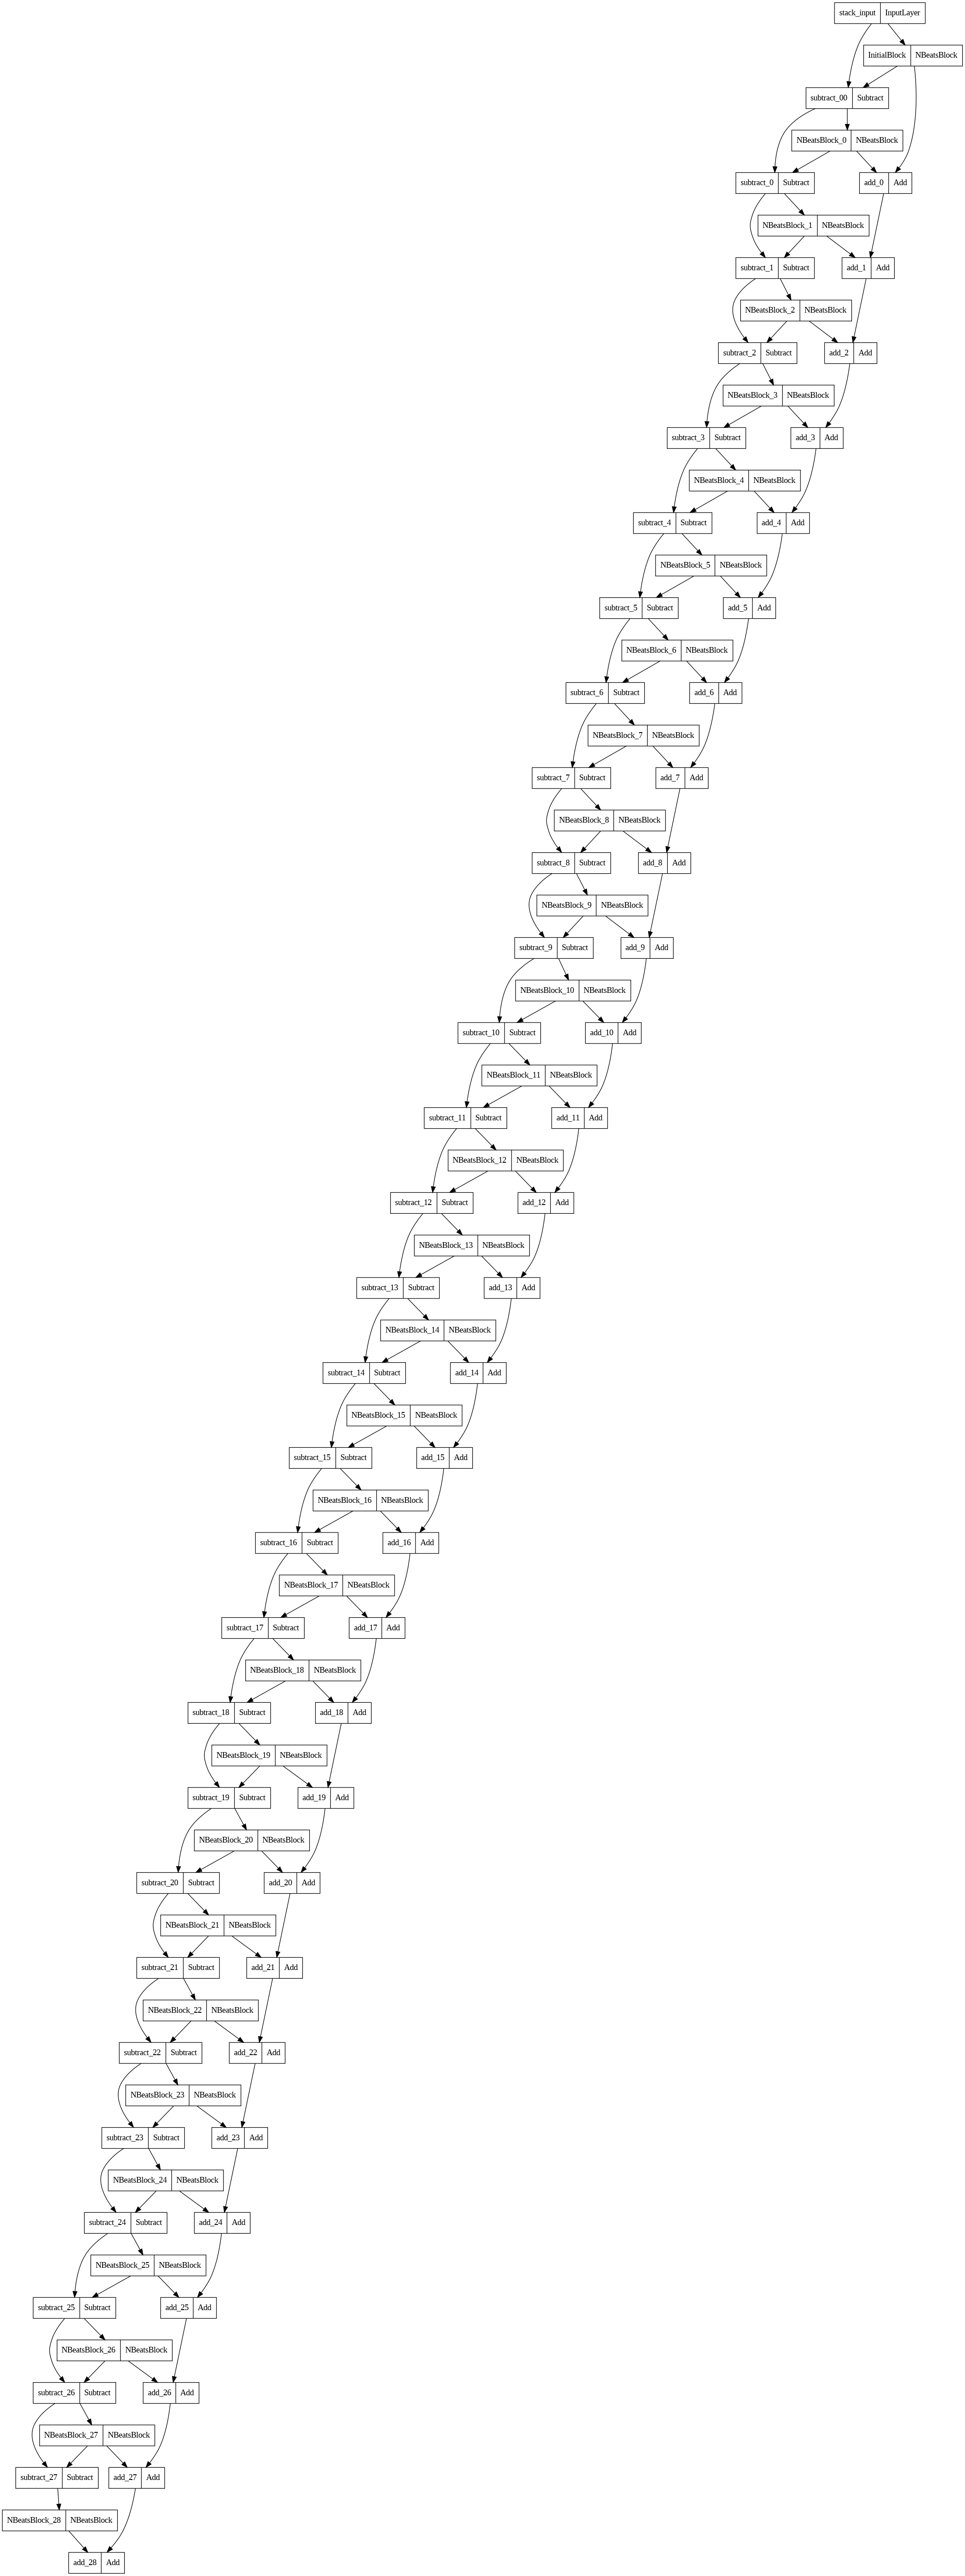

In [238]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 7: Create an ensemble (multiple models stacked together)

In [239]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=100,
                        loss_fns=["mae", "mse", "mape"]):

  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize layers with normal (Gaussian) distribution so we can use the models for prediction
        # interval estimation later: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])

      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models # return list of trained models

In [240]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 314: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 440: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 540: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mse for 1000 epochs, model number: 0
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 259: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 787: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 887: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 503: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 1
Optimizing model by reducing: mape for 1000 epochs, model number: 1

Epoch 370: ReduceLROnPlateau reduci

In [241]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data) # make predictions with current ensemble model
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

# Create a list of ensemble predictions
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 35ms/step


<tf.Tensor: shape=(15, 72), dtype=float32, numpy=
array([[37425.156, 36276.26 , 36724.15 , ..., 39318.855, 39662.766,
        40038.94 ],
       [37552.598, 35936.83 , 36990.24 , ..., 39310.4  , 39899.902,
        40309.62 ],
       [37667.746, 35708.28 , 36662.883, ..., 39421.97 , 39758.8  ,
        39716.867],
       ...,
       [37576.133, 35760.24 , 36476.934, ..., 39547.617, 39610.16 ,
        39668.188],
       [36416.242, 36402.35 , 36529.54 , ..., 40412.656, 39247.863,
        39183.33 ],
       [37261.934, 36377.043, 36460.523, ..., 39070.652, 39790.098,
        40128.086]], dtype=float32)>

In [242]:
# Evaluate ensemble model(s) predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results

{'mae': 749.0569,
 'mse': 1093253.5,
 'rmse': 1045.5876,
 'mape': 1.7793343,
 'mase': 1.0308188}

## Model 8: Train a model to predict the future

In [243]:
# Train model on entire data to make prediction for the next day
X_all = bitcoin_prices_windowed.drop(["Price", "block_reward"], axis=1).dropna().to_numpy() # only want prices, our future model can be a univariate model
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()


In [244]:
# 1. Turn X and y into tensor Datasets
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [245]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0) # don't print out anything, we've seen this all before

In [246]:
# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:

  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time
  for _ in range(into_future):

    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [255]:

INTO_FUTURE = 14 # Days
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 19ms/step
Predicting on: 
 [41805. 41805. 39852. 39245. 39782. 39936. 42013.] -> Prediction: 40921.18359375

1/1 [==============================] - 0s 19ms/step
Predicting on: 
 [41805.    39852.    39245.    39782.    39936.    42013.    40921.184] -> Prediction: 40374.96875

1/1 [==============================] - 0s 17ms/step
Predicting on: 
 [39852.    39245.    39782.    39936.    42013.    40921.184 40374.97 ] -> Prediction: 39625.4609375

1/1 [==============================] - 0s 20ms/step
Predicting on: 
 [39245.    39782.    39936.    42013.    40921.184 40374.97  39625.46 ] -> Prediction: 40178.15625

1/1 [==============================] - 0s 18ms/step
Predicting on: 
 [39782.    39936.    42013.    40921.184 40374.97  39625.46  40178.156] -> Prediction: 40593.14453125

1/1 [==============================] - 0s 25ms/step
Predicting on: 
 [39936.    42013.    40921.184 40374.97  39625.46  40178.156 40593.145] -> Prediction: 41071.804687

## Comparing models


In [285]:
model_results = pd.DataFrame({"naive_model": naive_results,
                              "Model_2_Dense": model_2_results,
                              "Model_3_Conv1": model_3_results,
                              "Model_4_LSTM": model_4_results,
                              "Model_5_Multivariate": model_5_results,
                              "Model_6_N-Beats": model_6_results,
                              "Model_7_ensemble": ensemble_results}).T


<Axes: >

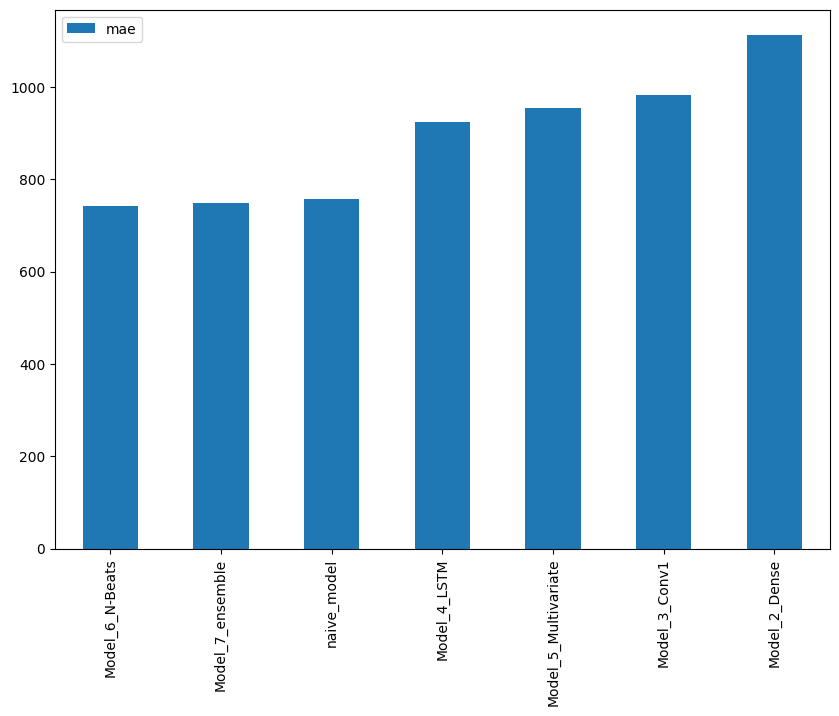

In [287]:
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")